# Prepartion

In [1]:
import os

import numpy as np
import pandas as pd
pd.options.display.max_columns = 500
pd.options.plotting.backend = 'matplotlib'

# import plotly.io as pio
# import plotly.express as px
# pio.templates.default = "plotly_white" # "plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"

# import seaborn as sns
# sns.set_style("whitegrid", {"axes.facecolor": ".9"})

import matplotlib.pyplot as plt
# plt.rcParams['text.usetex'] = True

%matplotlib inline

# Data Schema

In [2]:
df = pd.read_csv(
        "data/dataset.csv",
  #     na_values=[ '', ' ', '?', '?|?','None', '-NaN', '-nan', '', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null']
) #.fillna(np.nan)

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,primary_diagnosis_code,other_diagnosis_codes,number_outpatient,number_inpatient,number_emergency,num_lab_procedures,number_diagnoses,num_medications,num_procedures,ndc_code,max_glu_serum,A1Cresult,change,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,250.83,?|?,0,0,0,41,1,1,0,NaN,None,None,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,276,250.01|255,0,0,0,59,9,18,0,68071-1701,None,None,Ch,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,648,250|V27,2,1,0,11,6,13,5,0378-1110,None,None,No,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,8,250.43|403,0,0,0,44,7,16,1,68071-1701,None,None,Ch,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,197,157|250,0,0,0,51,5,8,0,0049-4110,None,None,Ch,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143424 entries, 0 to 143423
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              143424 non-null  int64 
 1   patient_nbr               143424 non-null  int64 
 2   race                      143424 non-null  object
 3   gender                    143424 non-null  object
 4   age                       143424 non-null  object
 5   weight                    143424 non-null  object
 6   admission_type_id         143424 non-null  int64 
 7   discharge_disposition_id  143424 non-null  int64 
 8   admission_source_id       143424 non-null  int64 
 9   time_in_hospital          143424 non-null  int64 
 10  payer_code                143424 non-null  object
 11  medical_specialty         143424 non-null  object
 12  primary_diagnosis_code    143424 non-null  object
 13  other_diagnosis_codes     143424 non-null  object
 14  numb

In [5]:
#
# According to the documentation, i've put the features into 2 sets
# URL: https://www.hindawi.com/journals/bmri/2014/781670/tab1/
#

#
# patient and encounter id
# (statistically not interesting)
ids = [
    'encounter_id',
    'patient_nbr'
]

numerical_features = [
    'time_in_hospital',    # Integer number of days between admission and discharge
    'number_outpatient',
    'number_inpatient',
    'number_emergency',
    'num_lab_procedures',
    'number_diagnoses',
    'num_medications',
    'num_procedures'
]

categorical_features = [
    'race', 
    'gender',
    'age', 
    'weight',              # documentation says numeric, but here it is categorical
    'admission_type_id',
    'discharge_disposition_id',
    'admission_source_id', 
    'payer_code',
    'medical_specialty',
    'primary_diagnosis_code',
    'other_diagnosis_codes',
    'ndc_code',
    'max_glu_serum',
    'A1Cresult',
    'change',
    'readmitted'
]

# Data Distribution

### Categorical features

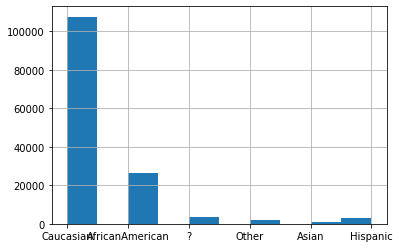

In [6]:
df["race"].hist()

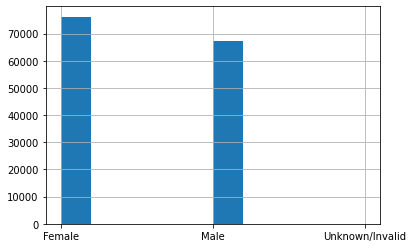

In [7]:
df["gender"].hist()

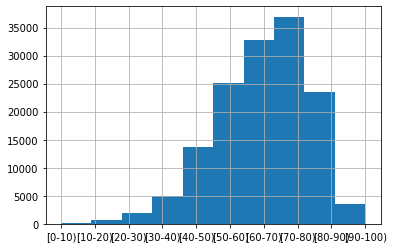

In [8]:
df["age"].hist()

### Numerical features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef5d8f9af0>,
      dtype=object)

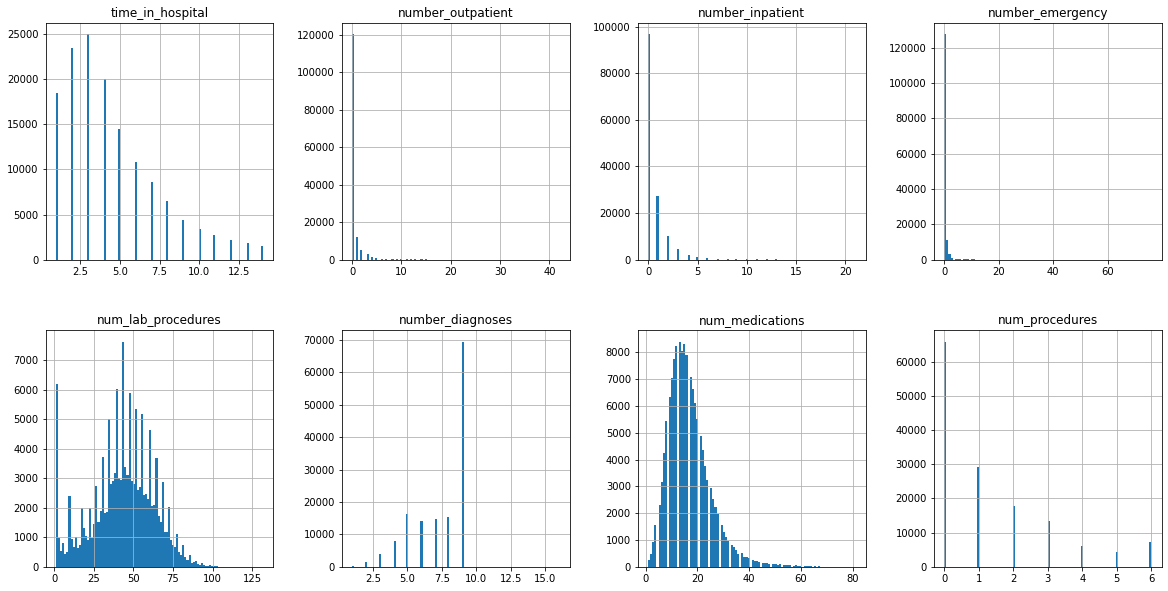

In [9]:
df[numerical_features].hist(figsize=(20,10), bins=100, layout=(2,4))

# Data missingness

In [10]:
df_columns_info = []

df_columns_info += [{
    'Feature': col, 
    'Frquency': df.shape[0],
    '# Freq_Null': df[col].isnull().sum(), 
    '% Freq_Null': np.around(df[col].isnull().sum()/df.shape[0]*100, 1), 
    '# Freq_Zeros': (df[col]==0).sum(), 
    '% Freq_Zeros': np.around((df[col] == 0).sum()/df.shape[0]*100, 1), 
    'Type': 'Numerical'
} for col in list(numerical_features)]

df_columns_info += [{
    'Feature': col, 
    'Frequency': df.shape[0],
    '# Freq_Null': df[col].isnull().sum(), 
    '% Freq_Null': np.around(df[col].isnull().sum()/df.shape[0]*100, 1), 
    '# Freq_Zeros': '-', 
    '% Freq_Zeros': '-', 
    'Type': 'Categorical'
} for col in list(categorical_features)]


pd.DataFrame(df_columns_info)

,Feature,Frquency,# Freq_Null,% Freq_Null,# Freq_Zeros,% Freq_Zeros,Type,Frequency
0,time_in_hospital,143424.0,0,0.0,0,0,Numerical,NaN
1,number_outpatient,143424.0,0,0.0,120027,83.7,Numerical,NaN
2,number_inpatient,143424.0,0,0.0,96698,67.4,Numerical,NaN
3,number_emergency,143424.0,0,0.0,127444,88.9,Numerical,NaN
4,num_lab_procedures,143424.0,0,0.0,0,0,Numerical,NaN
5,number_diagnoses,143424.0,0,0.0,0,0,Numerical,NaN
6,num_medications,143424.0,0,0.0,0,0,Numerical,NaN
7,num_procedures,143424.0,0,0.0,65788,45.9,Numerical,NaN
8,race,NaN,0,0.0,-,-,Categorical,143424.0
9,gender,NaN,0,0.0,-,-,Categorical,143424.0


# Data Outlier

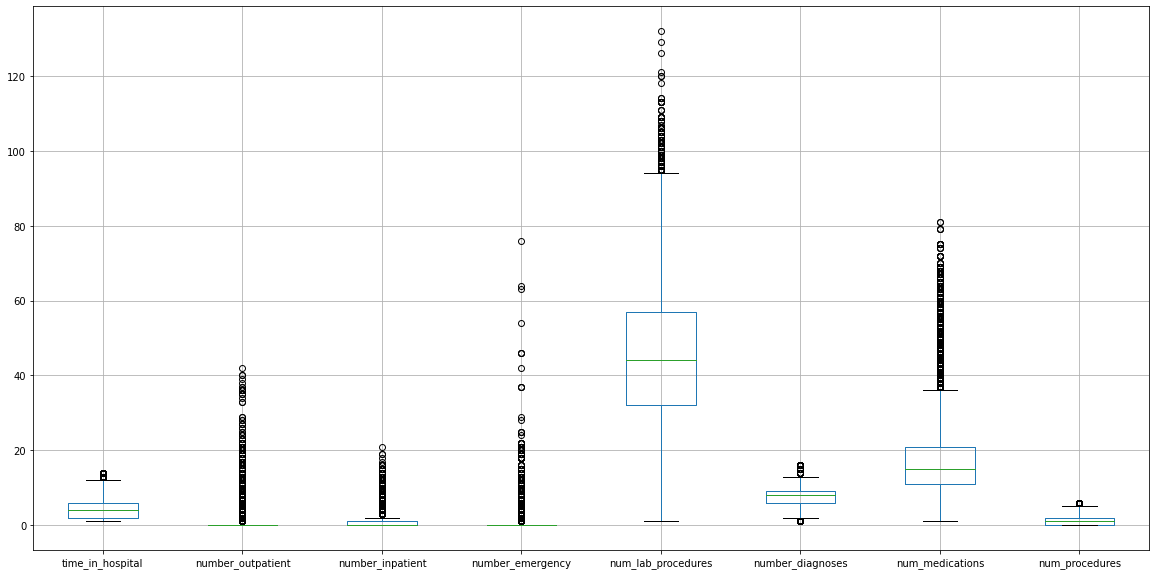

In [11]:
df[numerical_features].boxplot(figsize=(20,10))